In [ ]:
# !pip install yfinance
import yfinance as yahooFinance

In [ ]:
GetRILInformation = yahooFinance.Ticker("Reliance.NS")

In [ ]:
#Get complete RIL data
# print(GetRILInformation.info)

# display Company Sector
print("Company Sector : ", GetRILInformation.info['sector'])
 
# display Price Earnings Ratio
print("Price Earnings Ratio : ", GetRILInformation.info['trailingPE'])
 
# display Company Beta
print(" Company Beta : ", GetRILInformation.info['beta'])

#Get key Value pairing
for key, value in GetRILInformation.info.items():
    print(key, ":", value)

In [ ]:
#print(GetRILInformation.history(period="5y"))
# Can also try - 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,5y, 10y and ytd.

In [ ]:
#Trying Moving Average

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math

pd.set_option('mode.chained_assignment', None)

In [2]:
# Initialise the data 
long_MA = 200
short_MA = 17
#initial_wealth = '1000'
stock = 'Reliance.NS'
period = '5y'
startdate =  '2016-10-31'
enddate = '2022-07-31'
interval = '1d'
#totalprofit = 0

In [3]:
def get_stock_data(stock,startdate,enddate,period,interval):
        ticker = stock  
        yf.pdr_override()
        df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval,period=period)
        df.reset_index(inplace=True) 
        df['Date'] = df['Date'].dt.date
      
        return df
      
df = get_stock_data(stock,startdate,enddate,period,interval)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237762,4718327
1,2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086243,3248957
2,2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182800,3374427
3,2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812
4,2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178955,4387036


In [10]:
## get 1d,5d,10d difference in price
df['1d_diff'] = df['Close'].diff(periods=-1)
df['5d_diff'] = df['Close'].diff(periods=-5)
df['10d_diff'] = df['Close'].diff(periods=-10)

In [11]:
#Simple Moving Average

df['SMA3'] = df['Close'].rolling(3).mean()
df['SMA5'] = df['Close'].rolling(5).mean()
df['SMA9'] = df['Close'].rolling(9).mean()
df['SMA15'] = df['Close'].rolling(15).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
# df.dropna(inplace=True)

In [12]:
## Exponential moving average
df['EMA3'] = df['Close'].ewm(span=3,adjust=False).mean()
df['EMA5'] = df['Close'].ewm(span=5,adjust=False).mean()
df['EMA9'] = df['Close'].ewm(span=9,adjust=False).mean()
df['EMA15'] = df['Close'].ewm(span=15,adjust=False).mean()
df['EMA30'] = df['Close'].ewm(span=30,adjust=False).mean()

In [13]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

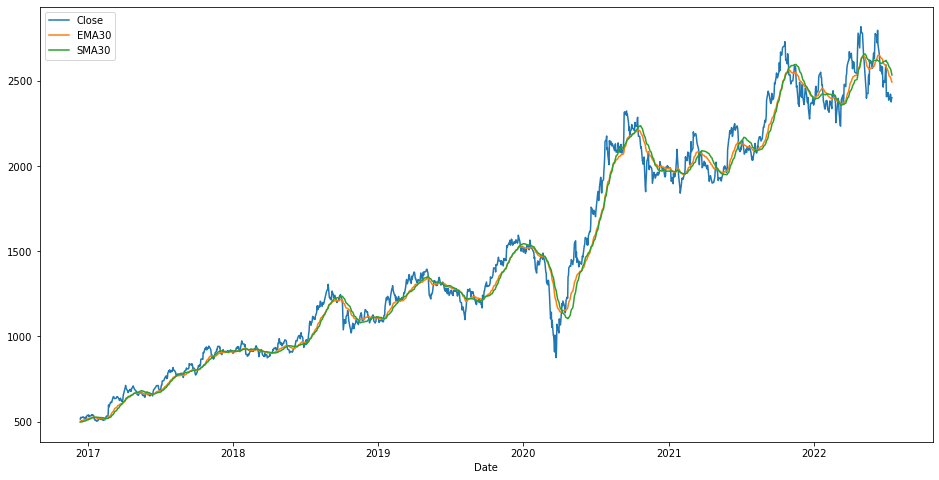

In [14]:
df.plot(kind = "line",x="Date",y=["Close","EMA30","SMA30"],figsize=(16,8) )

In [ ]:
# df[[ 'EMA9', 'EMA15']].plot(label='RELIANCE',figsize=(16, 8))

In [ ]:
# #Cumulative Mean
# df['CMA30'] = df['Close'].expanding().mean()

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,SMA3,SMA5,SMA9,SMA15,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30
29,2016-12-13,509.173553,515.612488,508.950653,515.018127,501.832367,4783826,-9.757507,-8.965027,-12.333130,511.146505,506.711877,501.177117,497.654399,497.400968,510.925976,507.810375,503.683619,500.984710,501.394308
30,2016-12-14,515.018127,527.227417,514.225647,524.775635,511.339996,11140265,3.244202,-1.857422,4.853943,516.190358,512.690204,504.575460,499.321924,497.541305,517.850805,513.465462,507.902022,503.958576,502.902781
31,2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178925,8921708,-2.080261,-0.198120,-6.191284,520.441732,515.949316,507.778436,501.488059,498.023402,519.691119,516.154119,510.627905,506.155183,504.104629
32,2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205872,6895825,-2.674622,-0.074280,-12.506470,523.306254,518.742841,511.262082,503.583201,498.571539,521.651407,518.639977,513.224663,508.337247,505.363150
33,2016-12-19,522.546753,528.465698,522.224854,526.286316,512.812012,6926943,2.303162,7.479065,-11.169128,523.809814,522.244641,514.418274,506.089443,499.512618,523.968861,521.188757,515.836993,510.580880,506.713031


In [17]:
df['Volume_100k'] = round(df['Volume']/10**5,3)

In [18]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,...,SMA5,SMA9,SMA15,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k
1408,2022-07-11,2376.500000,2428.800049,2370.000000,2423.899902,2423.899902,6390604,3.449951,1.649902,3.500000,...,2409.700000,2449.633301,2474.783317,2574.979997,2411.709763,2417.687410,2439.967735,2472.975022,2523.815943,63.906
1409,2022-07-12,2404.000000,2439.699951,2404.000000,2420.449951,2420.449951,4974502,42.899902,-16.650146,-1.050049,...,2407.139990,2431.888862,2463.873307,2567.906665,2416.079857,2418.608257,2436.064178,2466.409388,2517.147169,49.745
1410,2022-07-13,2427.300049,2434.000000,2373.000000,2377.550049,2377.550049,6564435,-19.599854,-125.449951,-41.649902,...,2400.279980,2407.655545,2455.336637,2559.375000,2396.814953,2404.922187,2424.361352,2455.301971,2508.140903,65.644
1411,2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,2397.149902,7831798,-4.650146,-89.150146,-59.950195,...,2402.089941,2406.372206,2450.816634,2548.469995,2396.982428,2402.331426,2418.919062,2448.032962,2500.980193,78.318
1412,2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,2401.800049,4431880,-20.449951,-101.300049,-107.649902,...,2404.169971,2405.049995,2444.266634,2535.879997,2399.391238,2402.154300,2415.495260,2442.253848,2494.581474,44.319


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1384.0,1.504286e+03,6.351881e+02,503.725189,9.410424e+02,1.325362e+03,2.088250e+03,2.856150e+03
High,1384.0,1.521988e+03,6.425370e+02,509.569794,9.543289e+02,1.344505e+03,2.108550e+03,2.856150e+03
Low,1384.0,1.485656e+03,6.270596e+02,501.644897,9.333403e+02,1.309190e+03,2.066200e+03,2.786100e+03
Close,1384.0,1.503078e+03,6.343156e+02,503.180359,9.420206e+02,1.323108e+03,2.085850e+03,2.819850e+03
Adj Close,1384.0,1.493032e+03,6.399194e+02,490.297638,9.249614e+02,1.309229e+03,2.081192e+03,2.819850e+03
Volume,1384.0,1.006818e+07,7.436121e+06,787160.000000,5.699576e+06,7.884193e+06,1.146107e+07,6.584835e+07
1d_diff,1384.0,-1.378058e+00,3.071908e+01,-152.649902,-1.427095e+01,-8.460693e-01,1.260556e+01,1.869500e+02
5d_diff,1384.0,-7.037953e+00,6.892311e+01,-242.500000,-4.075740e+01,-6.233307e+00,2.510925e+01,3.058000e+02
10d_diff,1384.0,-1.398363e+01,9.674583e+01,-309.500000,-6.543480e+01,-1.103293e+01,3.206149e+01,4.180374e+02
SMA3,1384.0,1.501712e+03,6.340850e+02,505.293660,9.405966e+02,1.324388e+03,2.088071e+03,2.796850e+03


In [20]:
df.to_csv("reliance_prices.csv",index=False)